## 3.1 Loading passwords with a function
In the last notebook you learned how to read passwords from a text file. Since you are going to reuse this code many times, it is a perfect candidate to be implemented in a function. The function needs to have one (string) parameter which is the name of the file, and the function should return the preprocessed (all `"\n"` removed) and filtered (no empty passwords) list of passwords. You can use the following template for the function:
```python
def load_passwords(path):
    # load the passwords here
    return passwords
```

1. Write the function that returns a list of passwords from a text file. Copy the template above or write the function from scratch.
2. What happens if you call the function without any argument `load_passwords()`? The error message will tell you exactly what is wrong with the function call.
3. Load the passwords from the file `passwords.txt` into a list. How many passwords are left after the preprocessing and filtering?
4. Count the number of passwords in the list that _only_ contain alphabetic characters, numeric characters or special characters respectively. Try to use list comprehensions wherever possible. An example for a password with only special characters is `"!?:"`. Examples for a purely alphabetic password or a purely numeric password are `"abc"` and `"123"` respectively.
5. EXTRA: Add a boolean parameter called `load_empty` that allows you to optionally load empty passwords. If you call the function with the argument `load_empty=True`, the empty lines will be included in the list of passwords.

In [1]:
# task 1, option 1: regular for loop + iterate over the file variable f
def load_passwords(path):
    passwords = []
    with open(path) as f:
        for line in f:
            password = line.strip("\n")
            if password:
                passwords.append(password)

    return passwords

In [2]:
# task 1, option 2: list comprehension + iterate over the file variable f
def load_passwords(path):
    with open(path) as f:
        return [line.strip("\n") for line in f if line.strip("\n")]

In [3]:
# task 1, option 3: regular for loop + split the entire file at the newline characters
def load_passwords(path):
    passwords = []
    with open(path) as f:
        for password in f.read().split("\n"):
            if password:
                passwords.append(password)

    return passwords

In [4]:
# task 1, option 4: list comprehension + split the entire file at the newline characters
def load_passwords(path):
    with open(path) as f:
        return [password for password in f.read().split("\n") if password]

In [5]:
# task 2: the error message will state that the required positional argument 'path' is missing
load_passwords()

TypeError: load_passwords() missing 1 required positional argument: 'path'

In [6]:
# task 3: use the function for the text file with 9000 passwords
passwords = load_passwords("passwords.txt")
len(passwords)

8879

In [7]:
# task 4: get the alphabetic character passwords
alphabetic_passwords = [password for password in passwords if password.isalpha()]
len(alphabetic_passwords)

2283

In [8]:
# task 4: get the numeric character passwords
numeric_passwords = [password for password in passwords if password.isnumeric()]
len(numeric_passwords)

1262

In [9]:
# task 4: define a function to check if a password contains only special characters
def is_special(password):
    for char in password:
        # return False as soon as you find an alphabetic character or a numeric character
        if char.isalpha() or char.isnumeric():
            return False

    # return True if you don't find an alphabetic character or a numeric character during the for-loop
    return True

# use the result of the function in a list comprehension to get the special character passwords
special_passwords = [password for password in passwords if is_special(password)]
len(special_passwords)

28

In [10]:
# task 5: add a second parameter 'load_empty'
def load_passwords_improved(path, load_empty):
    with open(path) as f:
        # include the boolean parameter 'load_empty' with an or in the condition
        # if 'load_empty' is True, the entire condition will always be True regardless of the 'password'
        return [password for password in f.read().split("\n") if password or load_empty]

In [11]:
# task 5: the list of all passwords will have a length of 9000
all_passwords = load_passwords_improved("passwords.txt", True)
len(all_passwords)

9000

## 3.2 Normalized length distribution
Instead of the function `np.bincount()`, you can also use the function `np.unique()` to get the length distribution. As the name suggests, the primary usage of the function `np.unique()` is to get the unique values from an array. If you have an array called `lengths`, the function `np.unique(lengths)` will return the unique values in the array `lengths` in ascending order. 
```python
lengths = np.array([2, 1, 4, 1, 1])
np.unique(lengths) -> np.array([1, 2, 4])
```
However, if you call the function with the additional argument `return_counts=True`, you will receive two arrays. The first array will contain the unique values and the second array will return the corresponding counts:
```python
lengths = np.array([2, 1, 4, 1, 1])
np.unique(lengths, return_counts=True) -> array([1, 2, 4]), array([3, 1, 1])
```
Compared to using `np.bincount()`, the function `np.unique()` can directly give you the x-values and the y-data for a (length) distribution plot.

1. Reproduce the two examples in the exercise with the predefined array `lengths`. Make sure that you understand the relation between the `lengths` and the arrays returned from the function `np.unique()`.
2. Create a new array with at least ten integer values in the interval $[0, 5]$. Write down the unique values and counts that you expect in a markdown cell or on paper, and then use the function `np.unique()` to see if you were right.
3. Compute the array of lengths for the list of passwords that you loaded in the previous exercise. Use the function `np.unique()` to get the unique lengths and their counts.
4. Normalize the array of the length counts and store the result in a new array. If the new array is normalized correctly, the sum of the values in the array will be `1.0`.
5. Create a bar plot with the normalized length distribution. Add axis labels, add a title (that includes the number of passwords) and change one other property to improve the plot.

In [12]:
# import the packages numpy and matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# task 1: the unique lengths will be sorted in ascending order
lengths = np.array([2, 1, 4, 1, 1])
unique_lengths = np.unique(lengths)
unique_lengths

array([1, 2, 4])

In [14]:
# task 1: the counts are "aligned" with the unique lengths
lengths = np.array([2, 1, 4, 1, 1])
unique_lengths, length_counts = np.unique(lengths, return_counts=True)
unique_lengths, length_counts

(array([1, 2, 4]), array([3, 1, 1]))

In [15]:
# task 2: create your own array with length data from 0 to 5
lengths = np.array([0, 1, 1, 1, 5, 3, 2, 1, 2, 5, 3, 2, 1])
unique_lengths, length_counts = np.unique(lengths, return_counts=True)
unique_lengths, length_counts

(array([0, 1, 2, 3, 5]), array([1, 5, 3, 2, 2]))

In [16]:
# task 3: compute the lengths of the password dataset
lengths = np.array([len(password) for password in passwords])
unique_lengths, length_counts = np.unique(lengths, return_counts=True)

In [17]:
# task 4: the sum of length_counts is the same as len(passwords) or len(lengths) ...
normalized_length_counts = length_counts / np.sum(length_counts)
# ... and the sum of the distribution is now 1.0
np.sum(normalized_length_counts)

np.float64(1.0)

Text(0.5, 1.0, 'Normalized length distribution of 8879 passwords')

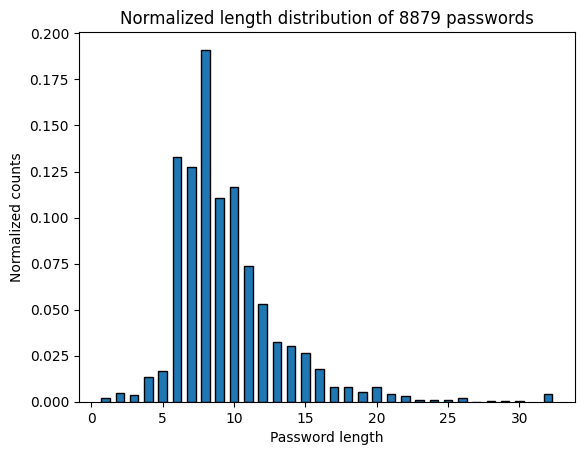

In [18]:
# task 5: reduce the bar width a bit since the bars are almost "touching" with the default width
plt.bar(unique_lengths, normalized_length_counts, width=0.6, edgecolor="k")
plt.xlabel("Password length")
plt.ylabel("Normalized counts")
plt.title(f"Normalized length distribution of {len(passwords)} passwords")

## 3.3 Counting duplicate passwords
With an increasing number of passwords, there will also be an increasing number of duplicate passwords. (Actually, there were already a few duplicates in the first 100 passwords. Did you notice any of them?) Getting the unique passwords and their counts should therefore be the first step of the data analysis. This will allow you to get a much better overview of your data without removing any information. Even though the list of passwords is not numerical data, you can still use the function `np.unique()` that was introduced in the [previous exercise](#3.2-Normalized-length-distribution).

1. Get the unique passwords and their counts with the function `np.unique()`. How are the unique passwords ordered? If the start of the array is too confusing, look at the last 50 unique passwords instead.
2. Compare the number of _unique_ passwords to the number of _all_ passwords. How many passwords in the initial dataset were duplicates? What is the maximum number of duplicates of a password?
3. Use NumPy array filtering to get the passwords with a count greater than 10 (greater than 2 if you are using the smaller dataset). If you are using one of these passwords yourself, you should probably consider changing it. :)
4. Compute the length of each unique password and store the result in a new array. How can you calculate the average length of **all** passwords from the unique arrays?
5. Plot the counts as a function of the lengths, add axis labels and add a title. You can either use the function `plt.scatter()` or you can use `plt.plot()` with a format that only displays markers.
6. Create a second plot and highlight the data points where the count is greater than 10 (greater than 2 if you are using the smaller dataset). You can either use a different color or increase the size of the points. Hint: Call the plot function twice and use NumPy array filtering to select the data. Add axis labels, assign labels to the data and add a legend.

In [19]:
# task 1: use the function np.unique() with the parameter return_counts=True to get the unique passwords and their counts
unique_passwords, password_counts = np.unique(passwords, return_counts=True)
unique_passwords, password_counts

(array([' ', '  ', '    ', ..., 'zzxxaass', 'zzxxcc', 'zzzzzzz'],
       shape=(5714,), dtype='<U32'),
 array([10,  5,  1, ...,  1,  1,  1], shape=(5714,)))

In [20]:
# task 1: the passwords are ordered alphabetically, if the first character is equal, they are ordered by the second character etc...
unique_passwords[-50:]

array(['zeHzwPuz6a', 'zefjo111', 'zehzwpuz6a', 'zenghui2', 'zenit-talnah',
       'zenit2009', 'zet1108', 'zevs_ev', 'zewapido', 'zezina80',
       'zezoxuba', 'zgd-', 'zgd-11', 'zink2008', 'zink2009', 'zitipemy',
       'zivosely', 'zjxtymnt', 'zjxtymnt,zk.,k.', 'zk.:', 'zllf',
       'zobokewa', 'zohegina', 'zolotarev08', 'zoloto12', 'zone12',
       'zorro2009', 'zoxalyjy', 'zsp9527412', 'zuewamarija', 'zujerujy',
       'zukizuki', 'zum-zum.ru', 'zupusyqe', 'zv0n04ek', 'zvezdopad',
       'zx11081991xz', 'zxcv123', 'zxcvbnm', 'zxcvbnm:', 'zxdf1324',
       'zyaqhlmw', 'zyhozazy', 'zyjibysi', 'zyx123456', 'zzgtbz',
       'zztop1', 'zzxxaass', 'zzxxcc', 'zzzzzzz'], dtype='<U32')

In [21]:
# task 1: special characters are sorted according to their unicode value, ord(" ") < ord("!") < ord("(") etc...
unique_passwords[:50]

array([' ', '  ', '    ', '  .', '  ?', ' 11.11.1987olga', '!!!voruch',
       '!@#$%^star', '&#33;@#&#036;%^QWERTY', '&#33;tktyf&#33;',
       '(pomo4ka)', '(pomo4ka</', '**', '*******', '**********',
       '*rhfcfdbwf*', ',ehrjdcrfzvfhbzktjybljdyf', '--', '-- zanoza',
       '-1111199', '-11111999', '-111999', '-331279', '-4121113', '-djuz',
       '.', '.1234.', '.KF2440491', '.MORE.', '.andrei', '.hxtr1981',
       '.kbxrf', '.kbz1177', '.princessl', '000---11', '00000', '000000',
       '00000000', '000000000', '000459', '000666', '0009124560',
       '000aaaq', '000rtye', '001110', '00174520', '002002002', '003145',
       '01.07.2002', '010101'], dtype='<U32')

In [22]:
# task 2: compare the length of the initial password list to the shape of the unique passwords
len(passwords), unique_passwords.shape

(8879, (5714,))

In [23]:
# task 2: their difference will be the number of duplicate passwords
len(passwords) - unique_passwords.shape[0]

3165

In [24]:
# task 2: get the largest value from the counts array
np.max(password_counts)

np.int64(71)

In [25]:
# task 3: use the condition password_counts > 10 to get the boolean array and use it as an index of the unique passwords
unique_passwords[password_counts > 10]

array(['11', '111111', '123456', '1234567', '123456789', 'passer2009',
       'passer2010', 'q492578', 'qwerty', 'ronaldo'], dtype='<U32')

In [26]:
# task 4: get the array of lengths from the unique passwords
lengths = np.array([len(password) for password in unique_passwords])
lengths

array([1, 2, 4, ..., 8, 6, 7], shape=(5714,))

In [27]:
# task 4, option 1: sum over the product of the lengths and the counts and divide by the number of all passwords
np.sum(lengths * password_counts) / len(passwords)

np.float64(9.48631602657957)

In [28]:
# task 4, option 2: sum over the product of the lengths and the counts and divide by the sum of the counts
np.sum(lengths * password_counts) / np.sum(password_counts)

np.float64(9.48631602657957)

In [29]:
# task 4, option 3: use the function np.average() with the password_counts as the weights
np.average(lengths, weights=password_counts)

np.float64(9.48631602657957)

Text(0.5, 1.0, 'Duplicate counts of 8879 passwords')

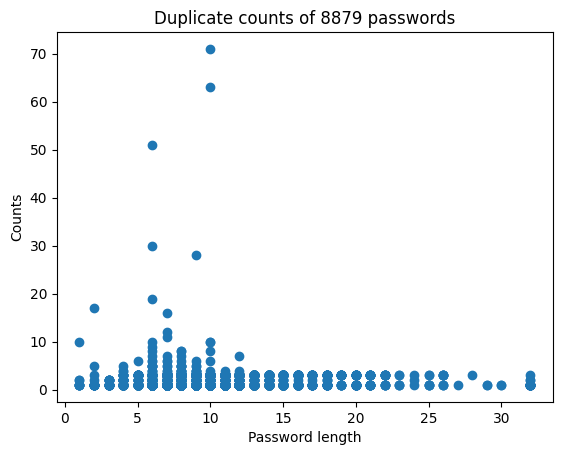

In [30]:
# task 5: display the counts as a function of the length with a scatter plot
plt.scatter(lengths, password_counts)
plt.xlabel("Password length")
plt.ylabel("Counts")
plt.title(f"Duplicate counts of {len(passwords)} passwords")

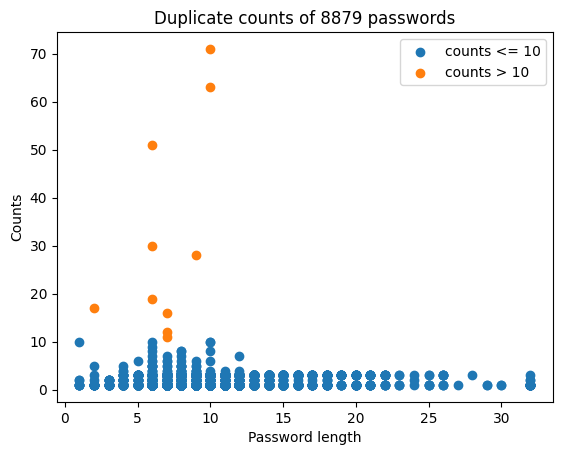

In [31]:
# task 6: separate the data with the condition counts > 10 and call the scatter plot twice
plt.scatter(lengths[password_counts <= 10], password_counts[password_counts <= 10], label="counts <= 10")
plt.scatter(lengths[password_counts > 10], password_counts[password_counts > 10], label="counts > 10")
plt.xlabel("Password length")
plt.ylabel("Counts")
plt.title(f"Duplicate counts of {len(passwords)} passwords")
plt.legend()

## 3.4 Sorting the passwords
The current order of the unique passwords is somewhat unfortunate to further analyze the data, since there are just some weird passwords beginning with special characters at the start of the array of _unique_ passwords. Sorting the arrays by the counts in descending order would make a lot more sense, the most recurring passwords would then come first in the arrays. If you just want to sort the array of counts, you can directly do that with the function `np.sort()`. By default the counts will be sorted in ascending order but you can reverse the array with the indexing `[::-1]`. See the following code snippet to sort an array in descending order:
```python
some_numbers = np.array([3, 1, 4, 1, 5, 9, 2, 6])
np.sort(some_numbers)[::-1] -> np.array([9, 6, 5, 4, 3, 2, 1, 1])
```
The problem here is that you will only sort the counts but not the unique passwords and their lengths. Instead of directly sorting the counts, you should therefore use the function `np.argsort()` that will return the indices to sort the counts. See the following code snippet that will have the same result as the example above:
```python
some_numbers = np.array([3, 1, 4, 1, 5, 9, 2, 6])
sorted_indices = np.argsort(some_numbers)[::-1]
some_numbers[sorted_indices]
```
You can then use the array `sorted_indices` to sort the _unique_ passwords, their counts and their lengths.

1. Reproduce the two examples in the exercise with the predefined array `some_numbers`.
2. Create a new array with at least seven integer values. Write down the results you expect from the functions `np.sort()` and `np.argsort()` in a Markdown cell or on paper, and then execute the functions to see if you were right. You can choose whether you want to sort the array in ascending order or in descending order.
3. Use the function `np.argsort()` and the reverse index to get the indices that will sort the counts in descending order.
4. Create three new arrays for the _unique_ passwords, their counts and their lengths by applying the sorted indices to the respective arrays.
5. Look at the first ten passwords and their counts in the sorted arrays. Which passwords did you expect to be in the "top 10"?

In [32]:
# task 1: directly sort the numbers in descending order
some_numbers = np.array([3, 1, 4, 1, 5, 9, 2, 6])
np.sort(some_numbers)[::-1]

array([9, 6, 5, 4, 3, 2, 1, 1])

In [33]:
# task 1: use the sorted indices to sort the numbers in descending order
some_numbers = np.array([3, 1, 4, 1, 5, 9, 2, 6])
sorted_indices = np.argsort(some_numbers)[::-1]
sorted_indices, some_numbers[sorted_indices]

(array([5, 7, 4, 2, 0, 6, 3, 1]), array([9, 6, 5, 4, 3, 2, 1, 1]))

In [34]:
# task 2: directly sort the numbers in ascending order 
more_numbers = np.array([8, 3, 1, 4, 4, 6, 2])
np.sort(more_numbers)

array([1, 2, 3, 4, 4, 6, 8])

In [35]:
# task 2: use the sorted indices to sort the numbers in ascending order
more_numbers = np.array([8, 3, 1, 4, 4, 6, 2])
sorted_indices = np.argsort(more_numbers)
sorted_indices, more_numbers[sorted_indices]

(array([2, 6, 1, 3, 4, 5, 0]), array([1, 2, 3, 4, 4, 6, 8]))

In [36]:
# task 3: use the function np.argsort() on the counts and reverse the array to get the indices for the descending order
sorted_indices = np.argsort(password_counts)[::-1]

In [37]:
# task 4: use the sorted indices on all three arrays to apply the sort
sorted_passwords = unique_passwords[sorted_indices]
sorted_counts = password_counts[sorted_indices]
sorted_lengths = lengths[sorted_indices]

In [38]:
# task 5: the first two passwords and "ronaldo" are rather surprising, they are probably only in the "top 10" due to the small sample size
# the numeric passwords and "qwerty" are (unfortunately) reasonable candidates for the most regularly used passwords
sorted_passwords[:10]

array(['passer2010', 'passer2009', '123456', '111111', '123456789',
       'qwerty', '11', '1234567', 'ronaldo', 'q492578'], dtype='<U32')

## 3.5 Storing arrays in a data frame
The sorting process of the three arrays in the previous section showed you that it is not very convenient to manage multiple NumPy arrays manually. In principle, you could stack the three arrays from the previous exercise to create a two-dimensional NumPy array. The data would then remain aligned if you change the order in any way. However, since one of the arrays stores string data and the other two arrays store integer data, this data is not suitable to be combined in a single array.  

The package [pandas](https://pandas.pydata.org/) (imported as `pd` by convention) resolves this issue with a so-called data frame that works very similar to a spreadsheet (from Excel or LibreOffice Calc). A data frame has an index (as an identifier of the rows) and columns to store the data. Each column in the data frame works just like a NumPy array, but the columns are not required to have the same data type. A data frame is therefore suited to store mixed data, such as your passwords, their counts and their lengths. See the following code snippet to create a data frame from the (unsorted) arrays:
```python
import pandas as pd
df = pd.DataFrame(dict(password=passwords, count=counts, length=lengths))
```
The variable name `df` is often used for data frames but you can also use a different variable name here. The keys in the dictionary will be the names of the columns and the values are the column data. By default, the index counts from `0` to the `len(unique_passwords) - 1`, just like `range(len(unique_passwords))` or `np.arange(len(unique_passwords))`.  

You can directly create a plot from the data frame using the method `df.plot(x, y)` where `x` and `y` are the names of the columns, the data is then taken directly from the data frame. See the following code snippet to plot the counts as a function of the length:
```python
df.plot("length", "count")
```

1. Import the package `pandas` and rename it to `pd`.
2. Create the data frame containing the password data from the [previous exercise](#3.4-Sorting-the-passwords) with the code snippet above and output the data frame.
3. How could you change the column names when creating the data frame? You do not have to find better names for the columns, just try any other names to understand how the renaming works.
4. Use the data frame method `df.plot()` to display the counts as a function of the length. Look at the docstring of the method to find out which parameter you have to change to get a scatter plot. How can you change the marker and the color?

In [39]:
# task 1: import the pandas package
import pandas as pd

In [40]:
# task 2: create the data frame
df = pd.DataFrame(dict(password=sorted_passwords, count=sorted_counts, length=sorted_lengths))
df

,password,count,length
0,passer2010,71,10
1,passer2009,63,10
2,123456,51,6
3,111111,30,6
4,123456789,28,9
...,...,...,...
5709,fbobh_68&*,1,10
5710,fbobh_3h'g,1,10
5711,fbobh_1(km,1,10
5712,fbobh_0rvj,1,10


In [41]:
# task 3: rename the columns by changing the keys of the dictionary
pd.DataFrame(data=dict(I_changed=sorted_passwords, the=sorted_counts, column_names=sorted_lengths))

,I_changed,the,column_names
0,passer2010,71,10
1,passer2009,63,10
2,123456,51,6
3,111111,30,6
4,123456789,28,9
...,...,...,...
5709,fbobh_68&*,1,10
5710,fbobh_3h'g,1,10
5711,fbobh_1(km,1,10
5712,fbobh_0rvj,1,10


<Axes: xlabel='length', ylabel='count'>

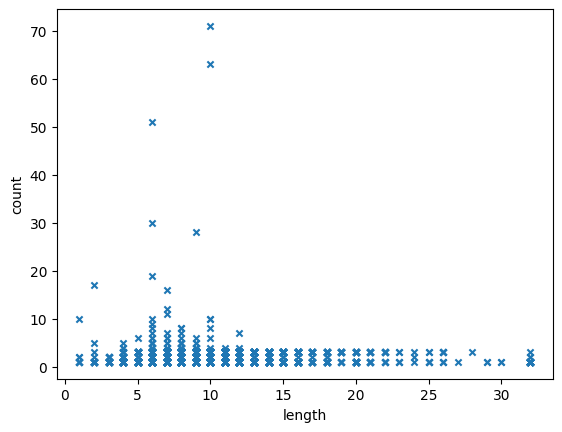

In [42]:
# task 4: use the argument kind="scatter" to change the type of the plot and use a different marker
df.plot("length", "count", kind="scatter", marker="x")

## 3.6 Accessing rows in a data frame
The data frame you created in the [previous exercise](#3.5-Storing-arrays-in-a-data-frame) should have three columns storing the (unique) passwords, their counts and their lengths. Since the passwords are the "identifier" of each row in the data frame, it makes sense to turn this column into the index column (which currently just holds the numbers $0$ to $n - 1$ where $n$ is the number of unique passwords). If you want to turn the existing column `"password"` in the data frame `df` into the index column, you can use the method
```python
df.set_index("password")
```
This will return a modified copy of the data frame. If you want to persist this change, you can either reassign the return value to the variable `df`, or you can call the method with the argument `inplace=True`. Be careful, in the latter case the method will not return anything! If you assign this to the variable `df`, the variable will just be empty afterwards.

With the new index column, you can directly use a password to read the corresponding row from the data frame. The following code snippet will return the row of the password `"123456"` (if it exists):
```python
df.loc["123456"]
```

Even though the passwords are now the index of the data frame, you can still use a numerical index to read rows from the data frame. The corresponding property of the data frame is called `.iloc`. See the following code snippet that will select the 10th row from the data frame (regardless of the actual value of the index column):
```python
df.iloc[9]
```
Instead of a single index, you can also use this with an index range to get multiple rows of the data frame. The indexing with `df.iloc[]` works just like the indexing of a NumPy array.

1. Turn your password column into the index column and persist the change.
2. Look at the documentation of the method `df.set_index()` to find out how to add a column to the index instead of completely replacing the index. Try this with one of the other columns in the data frame, but don't persist the change!
3. Read a few rows from the data frame by using the passwords as the index. You can try the passwords `"123456"` and `"ronaldo"`, or any other (memorable) password from the previous exercises. What happens if you are trying to get a password that does not exist?
4. Use the property `df.iloc` to read the first/last 20 passwords from the data frame. How can you reverse the data frame using the property `.iloc`?

In [43]:
# task 1: move the column "password" to the index and reassign the data frame to the variable "df"
df = df.set_index("password")

In [44]:
# task 2: the keyword argument "append" allows you to add append a column to the index
df.set_index("count", append=True)

,,length
password,count,
passer2010,71,10
passer2009,63,10
123456,51,6
111111,30,6
123456789,28,9
...,...,...
fbobh_68&*,1,10
fbobh_3h'g,1,10
fbobh_1(km,1,10


In [45]:
# task 3: if the password exists, a dictionary-like value is returned with all the information from the row in the data frame
df.loc["123456"]

count     51
length     6
Name: 123456, dtype: int64

In [46]:
# task 3: if the password does not exist, a KeyError is raised (just like in a dictionary if a key does not exist)
df.loc["test"]

KeyError: 'test'

In [47]:
# task 4: use an index range to read the first/last 20 passwords from the data frame
df.iloc[-20:]

,count,length
password,,
fbobh_otpr,1,10
fbobh_m&6!,1,10
fanera32,1,8
fagboy69,1,8
faga344546,1,10
fCN6uQf6,1,8
f9jjbTHm,1,8
f8849a19c3108a390f033c9d80768e67,1,32
f8849a19c3108a390f03,1,20


In [48]:
# task 4: you can use the index [::-1] to reverse the data frame
df.iloc[::-1]

,count,length
password,,
f81678,1,6
fbobh_0rvj,1,10
fbobh_1(km,1,10
fbobh_3h'g,1,10
fbobh_68&*,1,10
...,...,...
123456789,28,9
111111,30,6
123456,51,6


## 3.7 Accessing columns in a data frame
Regarding the columns a data frame works just like a dictionary. The key is the column name and the value will be the data saved in the column. You can use this to read existing columns from the data frame, and you can also use this to assign new columns to the data frame. See the following code snippet to get the column `"length"` from the data frame `df`:
```python
length_series = df["length"]
```
When you read a single column from a data frame, the column will be returned as a series. Instead of a single column name, you can also index the data frame with a list of column names. In that case, the returned variable is a data frame.

1. Compute the array of digit sums by iterating over the passwords in `df.index`. Assign the array to the data frame with the column name `"digit_sum"`.
2. Plot the digit sums in a histogram with a logarithmic y-axis. How can you adjust the number of bins?

In [49]:
# task 1: define a function to compute the digit sum
def digit_sum(password):
    return sum([int(char) for char in password if char.isnumeric()])

In [50]:
# task 1: assign the digit sums as an array to a column in the data frame
df["digit_sum"] = np.array([digit_sum(password) for password in df.index])

<Axes: ylabel='Frequency'>

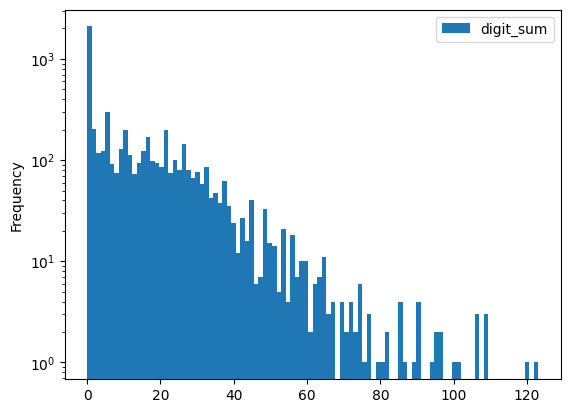

In [51]:
# task 2: you have to specify the column name with the keyword argument "y", since the first argument will be interpreted as the "x"
# use kind="hist" to get a histogram, use the keyword argument bins to change the number of bins
# use the keyword argument logy to enable a logarithmic y-axis
df.plot(y="digit_sum", kind="hist", bins=100, logy=True)

## 3.8 Computing more password metrics
Besides the count and the length of each password, it would be nice to have some more data for each password. In the [exercise 3.7](#3.7-Accessing-columns-in-a-data-frame) you have already added the digit sum that computes the sum of all digits in each password. Two more interesting values of passwords are the count of alphabetic characters and numeric characters. To compute these values, you just have to count the characters of the respective categories. See the following example password with an alphabetic character count of `4` and a numeric character count of `2`:
```python
password = "stop12!?"
```

1. Write two functions to count the alphabetic characters and numeric characters of a single password. Use this function to calculate the two values for all passwords, and assign them to the data frame as new columns.
2. Display the digit sum as a function of the numeric character count and as a function of the alphabetic character count. Can you already spot some correlation in the data?
3. EXTRA: Implement the function to count the special characters and also add the number of special characters as a new column to the data frame. Create a plot that shows the digit sum as a function of the special character count.

In [52]:
# task 1: only implement the functions to get the lists of alphabetic/numeric characters, you can compute their lengths with the function len() in the loop over the passwords
def get_alphabetic_characters(password):
    return [character for character in password if character.isalpha()]

# directly converting the characters to integers is just a matter of convenience since you might want to do something else with the list, for the length of the list it does not matter
def get_numeric_characters(password):
    return [int(character) for character in password if character.isnumeric()]

In [53]:
# task 1: count the alphabetic characters and numeric characters
n_alphabetic = np.array([len(get_alphabetic_characters(password)) for password in df.index])
n_numeric = np.array([len(get_numeric_characters(password)) for password in df.index])
df["n_alphabetic"] = n_alphabetic
df["n_numeric"] = n_numeric

<Axes: xlabel='n_numeric', ylabel='digit_sum'>

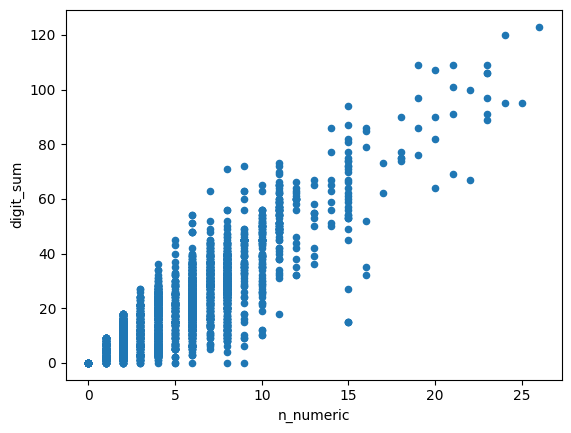

In [54]:
# task 2: the digit sum will be greater with an increasing count of numeric characters
df.plot("n_numeric", "digit_sum", kind="scatter")

<Axes: xlabel='n_alphabetic', ylabel='digit_sum'>

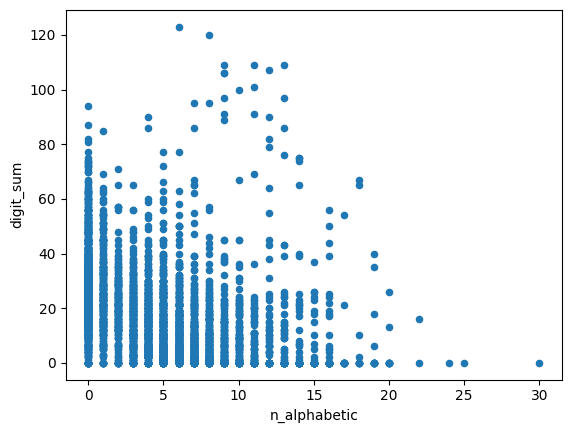

In [55]:
# task 2: the digit sum appears to be anticorrelated to the alphabetic character count
# this makes sense if you consider that alphabetic characters are taking away the "character space" from numeric characters in the passwords
df.plot("n_alphabetic", "digit_sum", kind="scatter")

In [56]:
# task 3: special characters are neither alphabetic nor numeric
def get_special_characters(password):
    return [character for character in password if not character.isalnum()]

In [57]:
# task 3: count the special characters and add a new column to the data frame
df["n_special"] = np.array([len(get_special_characters(password)) for password in df.index])

<Axes: xlabel='n_special', ylabel='digit_sum'>

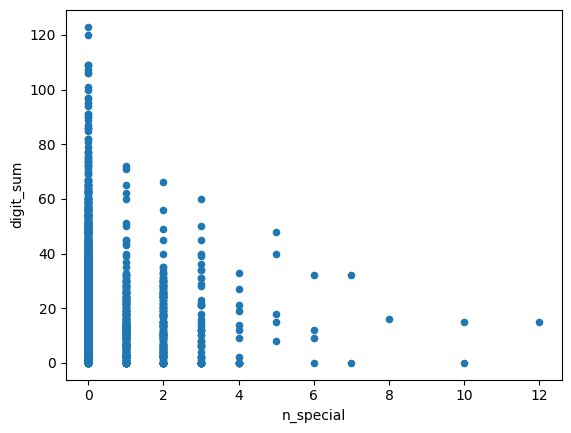

In [58]:
# task 3: just like for the alphabetic character count, the digit sum appears to be anticorrelated to the special character count
df.plot("n_special", "digit_sum", kind="scatter")

## 3.9 Statistics on data frame columns
If your data frame only contains numerical data, you can directly use the data frame methods `df.sum()`, `df.min()`, `df.max()`, `df.mean()` etc. to run these computations. The result will be a dictionary-like value where the keys are the names of the columns and the values are the results of the computations. You can also run the same methods on a single column (also called series) to immediately get a single return value.  

Besides computations on single columns, you can also compute correlations across the data frame columns. The corresponding method `df.corr()` will return a new data frame with the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between all the columns. If the coefficient is > 0, the two columns are positively correlated, and if the coefficient is < 0, the two columns are negatively correlated. The maximum correlations are reached at +1 and -1 respectively. Note that the Pearson correlation coefficient is only the default option of the method `df.corr()`, there are also other correlation coefficients available and you can even compute your own correlation coefficient.

1. Try the computational methods on the entire data frame. Do the unique passwords contain more alphabetic characters or numeric characters on average?
2. Use the methods `df.idxmax()` and `df.idxmin()` to get the passwords (which are the indices of the data frame) for the maximum/minimum value of each column.
3. Compute the Pearson correlation coefficient across all the columns in the data frame. Look at the individual coefficients, are any of them surprising to you?
4. Plot the alphabetic character count as a function of the numeric character count. Can you see the strongly negative correlation in the data?

In [59]:
# task 1: calculate the sum of all columns, this will for example give you the total sum of all digits
df.sum()

count            8879
length          52580
digit_sum       73868
n_alphabetic    31740
n_numeric       19470
n_special        1370
dtype: int64

In [60]:
# task 1: on average, there are fewer numeric characters than alphabetic characters in the unique passwords
df.mean()

count            1.553903
length           9.201960
digit_sum       12.927546
n_alphabetic     5.554778
n_numeric        3.407420
n_special        0.239762
dtype: float64

In [61]:
# task 2: apart from the count, the passwords with the maximum values are some really weird ones...
df.idxmax()

count                                 passer2010
length          f7034326808541d195fc2992cbea621c
digit_sum       8424893419b7aaf28746934e40f14453
n_alphabetic      ifyousmellwhattherockiscooking
n_numeric       8424893419b7aaf28746934e40f14453
n_special       1.1.1.1.1.1.1.1.1.1.1.1111n@gmai
dtype: object

In [62]:
# task 2: the minimum values are not really well defined since there are many passwords with the count 1, the length 1, etc...
df.idxmin()

count              yfafyz1
length                    
digit_sum           qwerty
n_alphabetic        123456
n_numeric           qwerty
n_special       passer2010
dtype: object

In [63]:
# task 3: the digit sum has a small positive correlation with the length, but a strong positive correlation with the number of numeric characters
# the number of alphabetic characters shows a negative correlation on the digit sum and the number of numeric characters
df.corr()

,count,length,digit_sum,n_alphabetic,n_numeric,n_special
count,1.000000,0.066973,-0.060152,0.115577,-0.072929,0.057134
length,0.066973,1.000000,0.341771,0.565346,0.342324,0.274027
digit_sum,-0.060152,0.341771,1.000000,-0.475848,0.905127,-0.047270
n_alphabetic,0.115577,0.565346,-0.475848,1.000000,-0.566441,0.082553
n_numeric,-0.072929,0.342324,0.905127,-0.566441,1.000000,-0.001811
n_special,0.057134,0.274027,-0.047270,0.082553,-0.001811,1.000000


<Axes: xlabel='n_numeric', ylabel='n_alphabetic'>

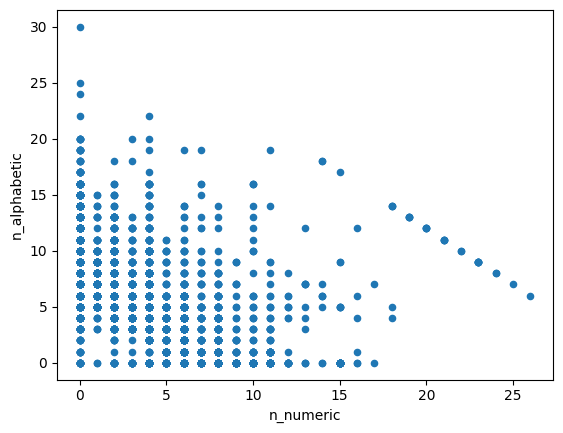

In [64]:
# task 4: the negative correlation is clearly visible between the numeric characters and the alphabetic characters
df.plot("n_numeric", "n_alphabetic", kind="scatter")

## 3.10 Sorting and querying a data frame
Since the index and the columns in the data frame are aligned, you can directly sort the entire data frame based on the values of one (or mulitple) column(s). The corresponding method `df.sort_values()` returns a sorted copy of data frame `df`, and you can decide the order with the boolean argument `ascending`. If you want to keep the sorted data frame, you have to overwrite the existing one, create a new variable or use the keyword argument `inplace`. See the following code snippet that returns the data frame sorted by the `"length"` in descending order:
```python
df.sort_values("length", ascending=False)
```

In a data frame you can use a so-called query to select specific rows from the data frame. The data frame method `df.query()` takes a string argument with one (or multiple) filter condition(s) and returns the reduced data frame. As an example, see the following code snippet that will return all rows where the length of the password is greater than 10:
```python
df.query("length > 10")
```
You can combine multiple conditions with `and`/`or` or the characters `&`/`|`. If you want to create more complex conditions, you can also use parentheses to group the conditions.

1. Try a few different queries with the comparison operators `==`, `<=`, `>` and `!=` to get used to the method `df.query()`. 
2. Use the query method to get all passwords with a length equal to 6 that occur between 5 and 9 times (including 5 and 9) in the data frame.
3. Combine the query and the sorting to find the 10 longest passwords that occur at least twice in the dataset. You can "stack" the methods and write everything in a single line of code.

In [65]:
# task 1: get the rows where the count is unequal to 2
df.query("count != 2")

,count,length,digit_sum,n_alphabetic,n_numeric,n_special
password,,,,,,
passer2010,71,10,3,6,4,0
passer2009,63,10,11,6,4,0
123456,51,6,21,0,6,0
111111,30,6,6,0,6,0
123456789,28,9,45,0,9,0
...,...,...,...,...,...,...
fbobh_68&*,1,10,14,5,2,3
fbobh_3h'g,1,10,3,7,1,2
fbobh_1(km,1,10,1,7,1,2


In [66]:
# task 1: get the rows where the length is greater than 30, there are some really weird passwords here...
df.query("length > 30")

,count,length,digit_sum,n_alphabetic,n_numeric,n_special
password,,,,,,
f7034326808541d195fc2992cbea621c,3,32,97,9,23,0
eeb535b32676f201a6fd36458d091699,2,32,106,9,23,0
Eeb535b32676f201a6fd36458d091699,2,32,106,9,23,0
55a118725b3586223f621cde342f3533,1,32,95,7,25,0
50cfb4f28592459d8a0d19948a6371d0,1,32,109,9,23,0
51336d050144e0cc607fd0de9e76d2d0,1,32,69,11,21,0
5049c858d56e6e6a3ed12b112bea7f7a,1,32,86,13,19,0
4b1e43a9266201b618f5ea0392d00e98,1,32,89,9,23,0
832a4c18fc9c6caef9f8cc11ed1afb6e,1,32,67,18,14,0


In [67]:
# task 2: use a combined query with the keyword "and"
df.query("length == 6 and (5 <= count <= 10)")

,count,length,digit_sum,n_alphabetic,n_numeric,n_special
password,,,,,,
123123,10,6,12,0,6,0
qwe123,9,6,6,3,3,0
pppppp,8,6,0,6,0,0
11111q,7,6,5,1,5,0
121212,6,6,9,0,6,0
12345q,6,6,15,1,5,0
12345s,5,6,15,1,5,0
112233,5,6,12,0,6,0
hateaa,5,6,0,6,0,0


In [68]:
# task 3: first apply the query to reduce the data frame to count > 1, then sort everything by the length and select the first ten passwords
df.query("count > 1").sort_values("length", ascending=False).iloc[:10]

,count,length,digit_sum,n_alphabetic,n_numeric,n_special
password,,,,,,
Eeb535b32676f201a6fd36458d091699,2,32,106,9,23,0
eeb535b32676f201a6fd36458d091699,2,32,106,9,23,0
f7034326808541d195fc2992cbea621c,3,32,97,9,23,0
794gerard143698prigge1994113,3,28,79,12,16,0
sharmaine005foskett6071988,3,26,44,16,10,0
rachelle289ariyoshi5251987,3,26,56,16,10,0
miss.marina.nikolaeva.2013,3,26,6,19,4,3
raymonde336schwegel7331987,3,26,50,16,10,0
victoria392eliezrie1992frp,3,26,35,19,7,0
